In [15]:

import torchvision.transforms.functional as F
from torchvision import transforms
import torch
import torch.nn as nn
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import test

In [16]:
sum(1,1)

TypeError: 'int' object is not iterable

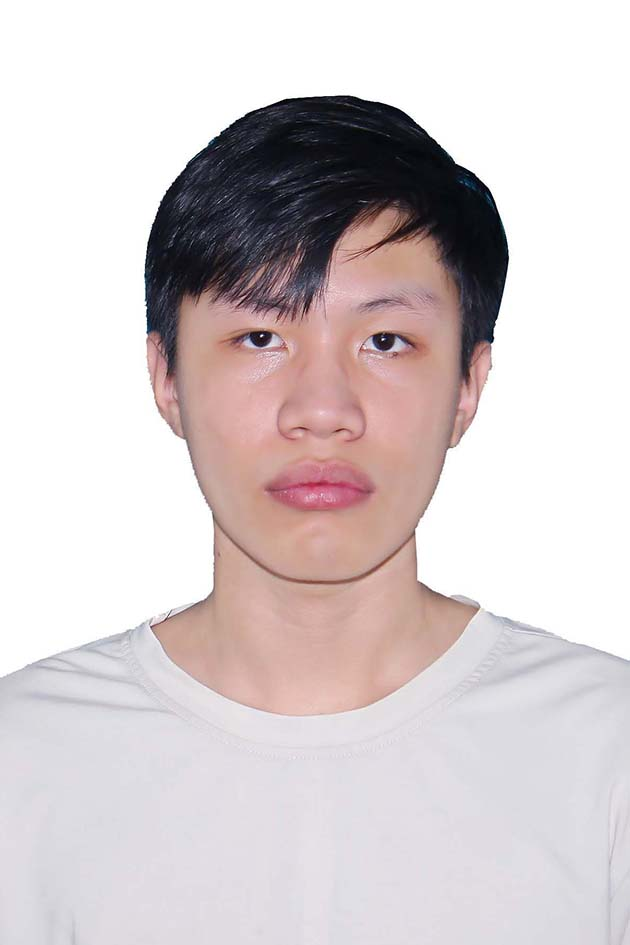

In [218]:
img2 = Image.open("b.jpg")
img2

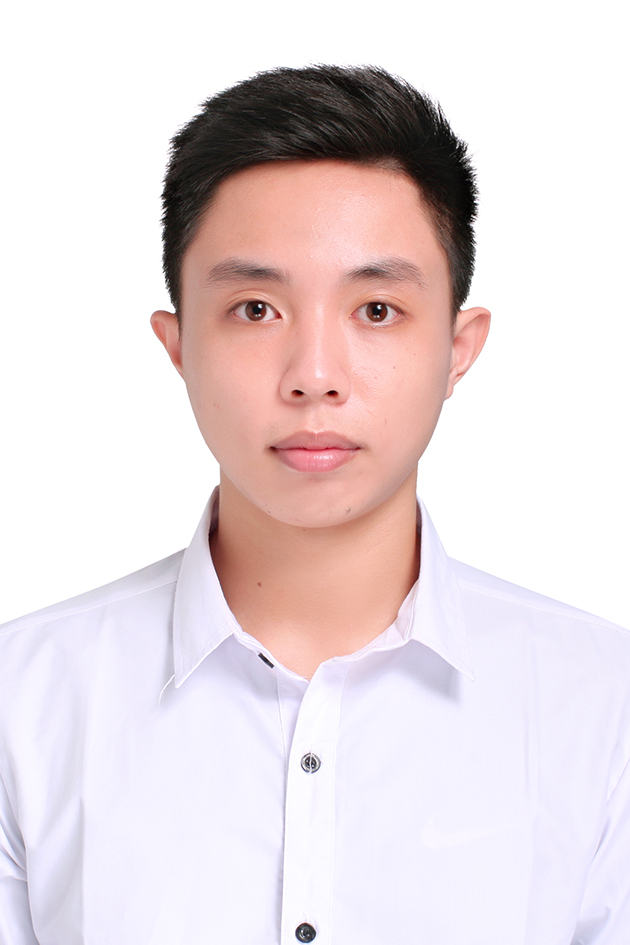

In [219]:
img1 = Image.open("a.jpg")
img1

In [220]:
convert = transforms.ToTensor()

row1 = convert(img1)
row1 = transforms.functional.crop(row1,0,0,630,630)
row1.shape

row2 = convert(img2)
row2 = transforms.functional.crop(row2,0,0,630,630)
row2.shape

torch.Size([3, 630, 630])

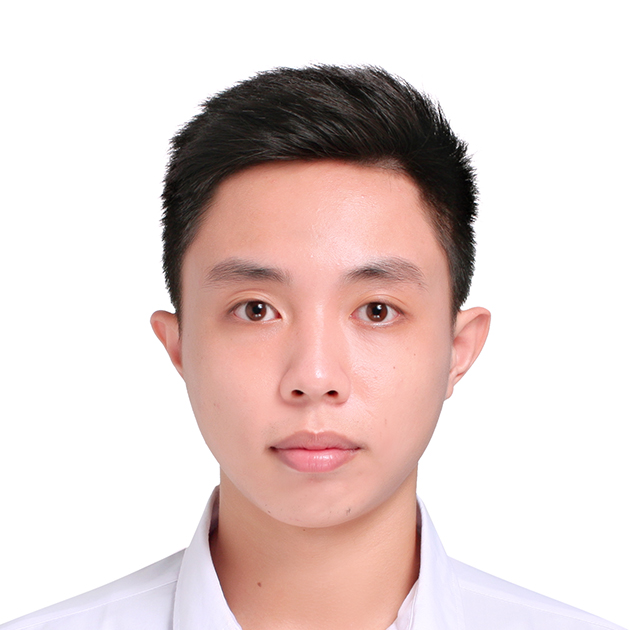

In [221]:
transform = transforms.ToPILImage()
image1 = transform(row1)
image1

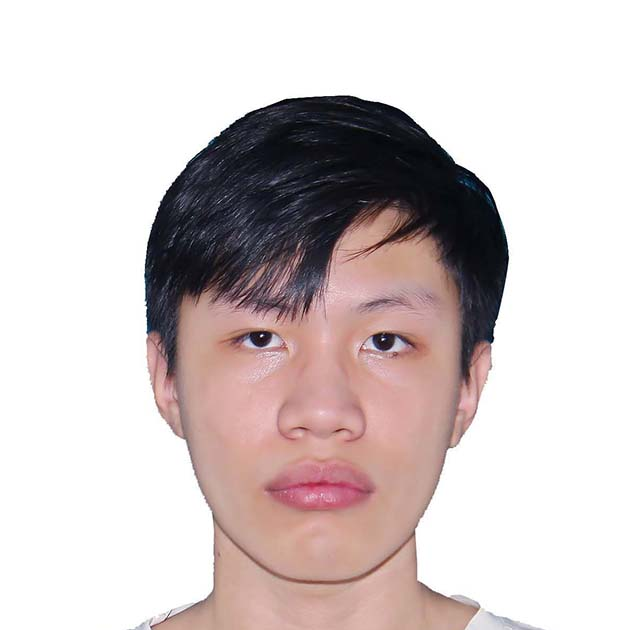

In [222]:
transform = transforms.ToPILImage()
image2 = transform(row2)
image2

In [223]:
# Model Encoder
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 6, 3), # 630x630x3 -> 628x628x6
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 628x628x6 -> 314x314x6
            nn.Conv2d(6, 16, 3), # 314x314x6 -> 312x312x16
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 312x312x16 -> 156x156x16
            nn.Conv2d(16, 32, 3), # 156x156x16-> 154x154x32
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 154x154x32-> 77x77x32   
            nn.Conv2d(32, 64, 3, padding=1), # 77x77x32-> 76x76x64
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 76x76x64-> 38x38x64
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 5, stride=3, padding=0),  # b, 8, 15, 15
            nn.LeakyReLU(True),
            nn.ConvTranspose2d(32, 16, 5, stride=3, padding=0),  # b, 8, 15, 15
            nn.LeakyReLU(True),
            nn.ConvTranspose2d(16, 8, 7, stride=3, padding=0,output_padding=1),  # b, 1, 28, 28
            nn.LeakyReLU(True),
            nn.ConvTranspose2d(8,3, 7, stride=1, padding=0),  # b, 1, 28, 28
        )
    def forward(self, x, y):
        return self.decoder((self.encoder(x) + self.encoder(y))/2) 

In [224]:
model = Generator()

result1 = model(row1)
result2 = model(row2)

result = (result1 + result2)/2

In [225]:
result2


tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0881, 0.0881, 0.0881,  ..., 0.0881, 0.0881, 0.0881],
         [0.0881, 0.0881, 0.0881,  ..., 0.0881, 0.0881, 0.0881],
         [0.0881, 0.0881, 0.0881,  ..., 0.0881, 0.0881, 0.

In [226]:
# Model Decoder
class NeuralNetworkDe(nn.Module):
    def __init__(self):
        super(NeuralNetworkDe, self).__init__()
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 5, stride=3, padding=0),  # b, 8, 15, 15
            nn.LeakyReLU(True),
            nn.ConvTranspose2d(32, 16, 5, stride=3, padding=0),  # b, 8, 15, 15
            nn.LeakyReLU(True),
            nn.ConvTranspose2d(16, 8, 7, stride=3, padding=0,output_padding=1),  # b, 1, 28, 28
            nn.LeakyReLU(True),
            nn.ConvTranspose2d(8,3, 7, stride=1, padding=0),  # b, 1, 28, 28
        )
    def forward(self, x):
        return self.decoder(x)

In [227]:
model2 = NeuralNetworkDe()

new = model2(result)

In [228]:
new.shape

torch.Size([3, 1061, 1061])

In [ ]:
img_new = transform(new)
img_new